# Age and Gender Detection
### Complete # TODO

# Requirements

In [24]:
# Importing Requirements
import cv2
import time
import numpy as np
import os
import matplotlib.pyplot as plt
import glob

In [25]:
def display_images_from_dict(images_dict, num_columns=3, size=5):
    titles = list(images_dict.keys())
    images = list(images_dict.values())
    num_rows = (len(images) + num_columns - 1) // num_columns

    plt.figure(figsize=(size * num_columns, size * num_rows))

    for index, (title, image) in enumerate(zip(titles, images)):
        plt.subplot(num_rows, num_columns, index + 1)
        if image is None:
            plt.text(0.5, 0.5, "No Image", fontsize=12, ha='center', va='center', color='red')
            plt.axis('off')
        else:
            cmap = 'gray' if len(image.shape) == 2 else None
            plt.imshow(image, cmap=cmap)
            plt.axis('off')
        plt.title(title, fontsize=8)

    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    plt.tight_layout(pad=0.1)
    plt.show()


# Camera Test

In [26]:
def visualize_fps(image, fps: int):
    # Check if the image is grayscale or colored.
    # If it's grayscale, set text color to white; if colored, set text color to green.
    if len(np.shape(image)) < 3:
        text_color = (255, 255, 255)  # White color for grayscale images.
    else:
        text_color = (0, 255, 0)  # Green color for colored images.

    # Define the row size for the text placement.
    row_size = 20 
    # Define the left margin for the text placement.
    left_margin = 24 

    # Set the font size and thickness for the text.
    font_size = 1
    font_thickness = 2

    # Format the FPS value into a string for displaying.
    fps_text = "FPS = {:.1f}".format(fps)
    # Set the text location on the image.
    text_location = (left_margin, row_size)
    
    # Place the FPS text on the image.
    cv2.putText(
        image,
        fps_text,
        text_location,
        cv2.FONT_HERSHEY_PLAIN,
        font_size,
        text_color,
        font_thickness,
    )

    # Return the modified image with the FPS text.
    return image


In [27]:
# Constants for camera settings
CAMERA_DEVICE_ID = 0  # ID for the camera device
IMAGE_WIDTH = 800  # Width of the captured image
IMAGE_HEIGHT = 600  # Height of the captured image
fps = 0  # Initial Frames Per Second (FPS) value

if __name__ == "__main__":  # Ensures that the code only runs when executed directly
    try:
        cap = cv2.VideoCapture(CAMERA_DEVICE_ID)  # Initialize video capture with the specified camera device ID

        while True:  # Infinite loop to continuously capture frames

            start_time = time.time()  # Record the start time to calculate FPS

            _, frame = cap.read()  # Capture a single frame from the camera

            frame = cv2.resize(frame, (IMAGE_WIDTH, IMAGE_HEIGHT))  # Resize the frame to the specified dimensions

            # Display the frame with FPS overlay
            cv2.imshow("frame", visualize_fps(frame, fps)) 

            end_time = time.time()  # Record the end time to calculate FPS

            # Calculate the time taken to process the frame
            seconds = end_time - start_time 
            # Calculate FPS based on the time taken to process the frame
            fps = 1.0 / seconds

            # Break the loop if the 'Esc' key (ASCII 27) is pressed
            if cv2.waitKey(33) == 27:  
                break
    except Exception as e:  # Handle exceptions that may occur
        print(e)  # Print the exception message
    finally:
        cv2.destroyAllWindows()  # Close all OpenCV windows
        cap.release()  # Release the camera resource


OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'



# Loading Video

In [28]:
# Constants for video settings
# Define the path to the video file using os.path.join
CAMERA_DEVICE_ID = os.path.join("videos", "Einstein_2.mp4")  # Path to the video file
IMAGE_WIDTH = 1000  # Width of the displayed image
IMAGE_HEIGHT = 600  # Height of the displayed image
fps = 0  # Initial Frames Per Second (FPS) value
FRAME_RATE = 30  # Desired frame rate
DURATION = 1 / FRAME_RATE  # Duration of each frame

if __name__ == "__main__":  # Ensures that the code only runs when executed directly
    try:
        cap = cv2.VideoCapture(CAMERA_DEVICE_ID)  # Initialize video capture with the specified video file path

        while True:  # Infinite loop to continuously capture frames
            start_time = time.time()  # Record the start time to calculate FPS

            _, frame = cap.read()  # Capture a single frame from the video
            frame = cv2.resize(frame, (IMAGE_WIDTH, IMAGE_HEIGHT))  # Resize the frame to the specified dimensions

            end_time = time.time()  # Record the end time to calculate FPS

            # Calculate the time taken to process the frame
            seconds = end_time - start_time

            # If the processing time is less than the desired frame duration, wait for the remaining time
            if seconds < DURATION:
                time.sleep(DURATION - seconds)

            # Recalculate the time taken to process the frame including sleep time
            seconds = time.time() - start_time
            # Calculate FPS based on the time taken to process the frame
            fps = 1.0 / seconds

            # Display the frame with FPS overlay
            cv2.imshow("frame", visualize_fps(frame, fps))

            # Break the loop if the 'Esc' key (ASCII 27) is pressed
            if cv2.waitKey(33) == 27:  
                break
    except Exception as e:  # Handle exceptions that may occur
        print(e)  # Print the exception message
    finally:
        cv2.destroyAllWindows()  # Close all OpenCV windows
        cap.release()  # Release the video capture resource


# Loading Models

In [29]:
# File paths to the pre-trained models and configuration files.
# Define the paths to the model files using os.path.join
faceProto = os.path.join("models", "opencv_face_detector.pbtxt")
faceModel = os.path.join("models", "opencv_face_detector_uint8.pb")
ageProto = os.path.join("models", "age_deploy.prototxt")
ageModel = os.path.join("models", "age_net.caffemodel")
genderProto = os.path.join("models", "gender_deploy.prototxt")
genderModel = os.path.join("models", "gender_net.caffemodel")


# Mean values used for mean subtraction in preprocessing.
MODEL_MEAN_VALUES = (78.4263377603, 87.7689143744, 114.895847746)
# List of age ranges corresponding to the output of the age detection model.
ageList = [
    "(0-2)",
    "(4-6)",
    "(8-12)",
    "(15-20)",
    "(25-32)",
    "(38-43)",
    "(48-53)",
    "(60-100)",
]
# List of gender labels corresponding to the output of the gender detection model.
genderList = ["Male", "Female"]

# Load the pre-trained models using the readNet function.
faceNet =  cv2.dnn.readNet(faceModel, faceProto) # Load neural network to detect faces using OpenCV
ageNet = cv2.dnn.readNet(ageModel, ageProto) #  Load age detection neural network using OpenCV
genderNet = cv2.dnn.readNet(genderModel, genderProto) #  Load gender detection neural network using OpenCV

# Detect Age and Gender in a Frame

In [30]:
def highlightFace(net, frame, conf_threshold=0.7):
    # Create a copy of the frame to avoid modifying the original image.
    frameOpencvDNN = np.copy(frame)
    # Get the height and width of the frame.
    frameHeight = frameOpencvDNN.shape[0]
    frameWidth = frameOpencvDNN.shape[1]
    # Create a blob from the image for input to the neural network.
    blob = cv2.dnn.blobFromImage(
        frameOpencvDNN, 1.0, (300, 300), [104, 117, 123], True, False
    )

    # Set the input for the network.
    net.setInput(blob)
    # Perform forward pass to get the detections.
    detections = net.forward()
    # Initialize an empty list to store face bounding boxes.
    faceBoxes = []
    # Iterate over all detections.
    for i in range(detections.shape[2]):
        # Get the confidence for the detection.
        confidence = detections[0, 0, i, 2]
        # Check if the detection confidence is above the threshold.
        if confidence > conf_threshold:
            # Get the coordinates of the bounding box.
            x1 = int(detections[0, 0, i, 3] * frameWidth)
            y1 = int(detections[0, 0, i, 4] * frameHeight)
            x2 = int(detections[0, 0, i, 5] * frameWidth)
            y2 = int(detections[0, 0, i, 6] * frameHeight)
            # Append the bounding box to the list.
            faceBoxes.append([x1, y1, x2, y2])
            # Draw the bounding box on the frame.
            cv2.rectangle(frameOpencvDNN, (x1, y1), (x2, y2), (0, 255, 0), 2)
    # Return the frame with bounding boxes and the list of bounding boxes.
    return frameOpencvDNN, faceBoxes

In [31]:
def detect_face_age_gender(frame, padding=20):
    # Highlight faces in the frame using the highlightFace function
    resultImg, faceBoxes = highlightFace(faceNet, frame)
    if not faceBoxes:  # Check if any faces were detected
        print("No face detected")
        return frame
    # Iterate over the detected face bounding boxes
    face = None
    for faceBox in faceBoxes:
        # Crop the face region with padding
        face = frame[
            max(0, faceBox[1] - padding) : min(
                faceBox[3] + padding, frame.shape[0] - 1
            ),
            max(0, faceBox[0] - padding) : min(
                faceBox[2] + padding, frame.shape[1] - 1
            ),
        ]

    if face is None:
        return
    # Create a blob from the face region for input to the neural networks
    blob = cv2.dnn.blobFromImage(
        face, 1.0, (227, 227), MODEL_MEAN_VALUES, swapRB=False
    )

    # Predict gender using the gender detection model
    # Set the input for the network.
    genderNet.setInput(blob)
    # Perform forward pass to get the detections.
    genderPreds = genderNet.forward()
    # Select the Gender with the most probability
    gender = genderList[genderPreds[0].argmax()]

    # Predict age using the age detection model
    # Set the input for the network.
    ageNet.setInput(blob)
    # Perform forward pass to get the detections.
    agePreds = ageNet.forward()
    # Select the age category with the most probability
    age = ageList[agePreds[0].argmax()]
    # Overlay the gender and age prediction on the image
    text = f"{gender}, {age}"
    x1, y1, x2, y2 = faceBox
    cv2.putText(resultImg, text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2, cv2.LINE_AA)
    cv2.rectangle(resultImg, (x1, y1), (x2, y2), (0, 255, 0), 2) 
    return resultImg

# Age and Gender Detection on Image

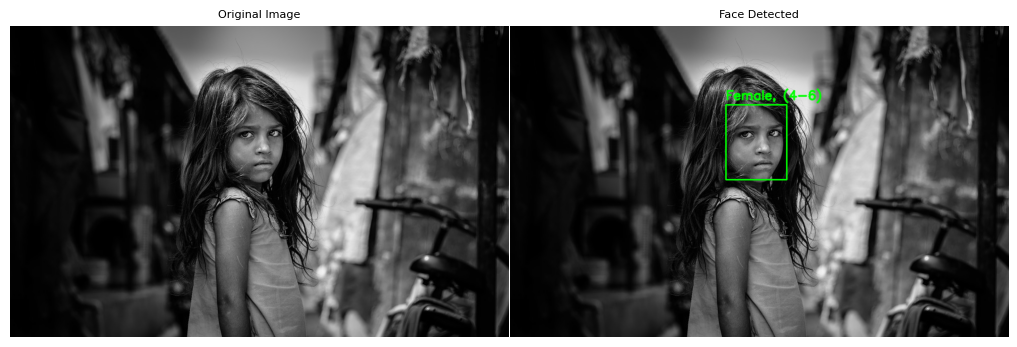

In [32]:
IMAGE_ADDRESS = os.path.join("images", "girl.jpg")

# Load Image
image = cv2.imread(IMAGE_ADDRESS)


# Convert color map from BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Detect Age and Gender
result = detect_face_age_gender(image)

# Display
images_dict = {
    "Original Image": image,
    "Face Detected": result,
}

display_images_from_dict(images_dict)

No face detected


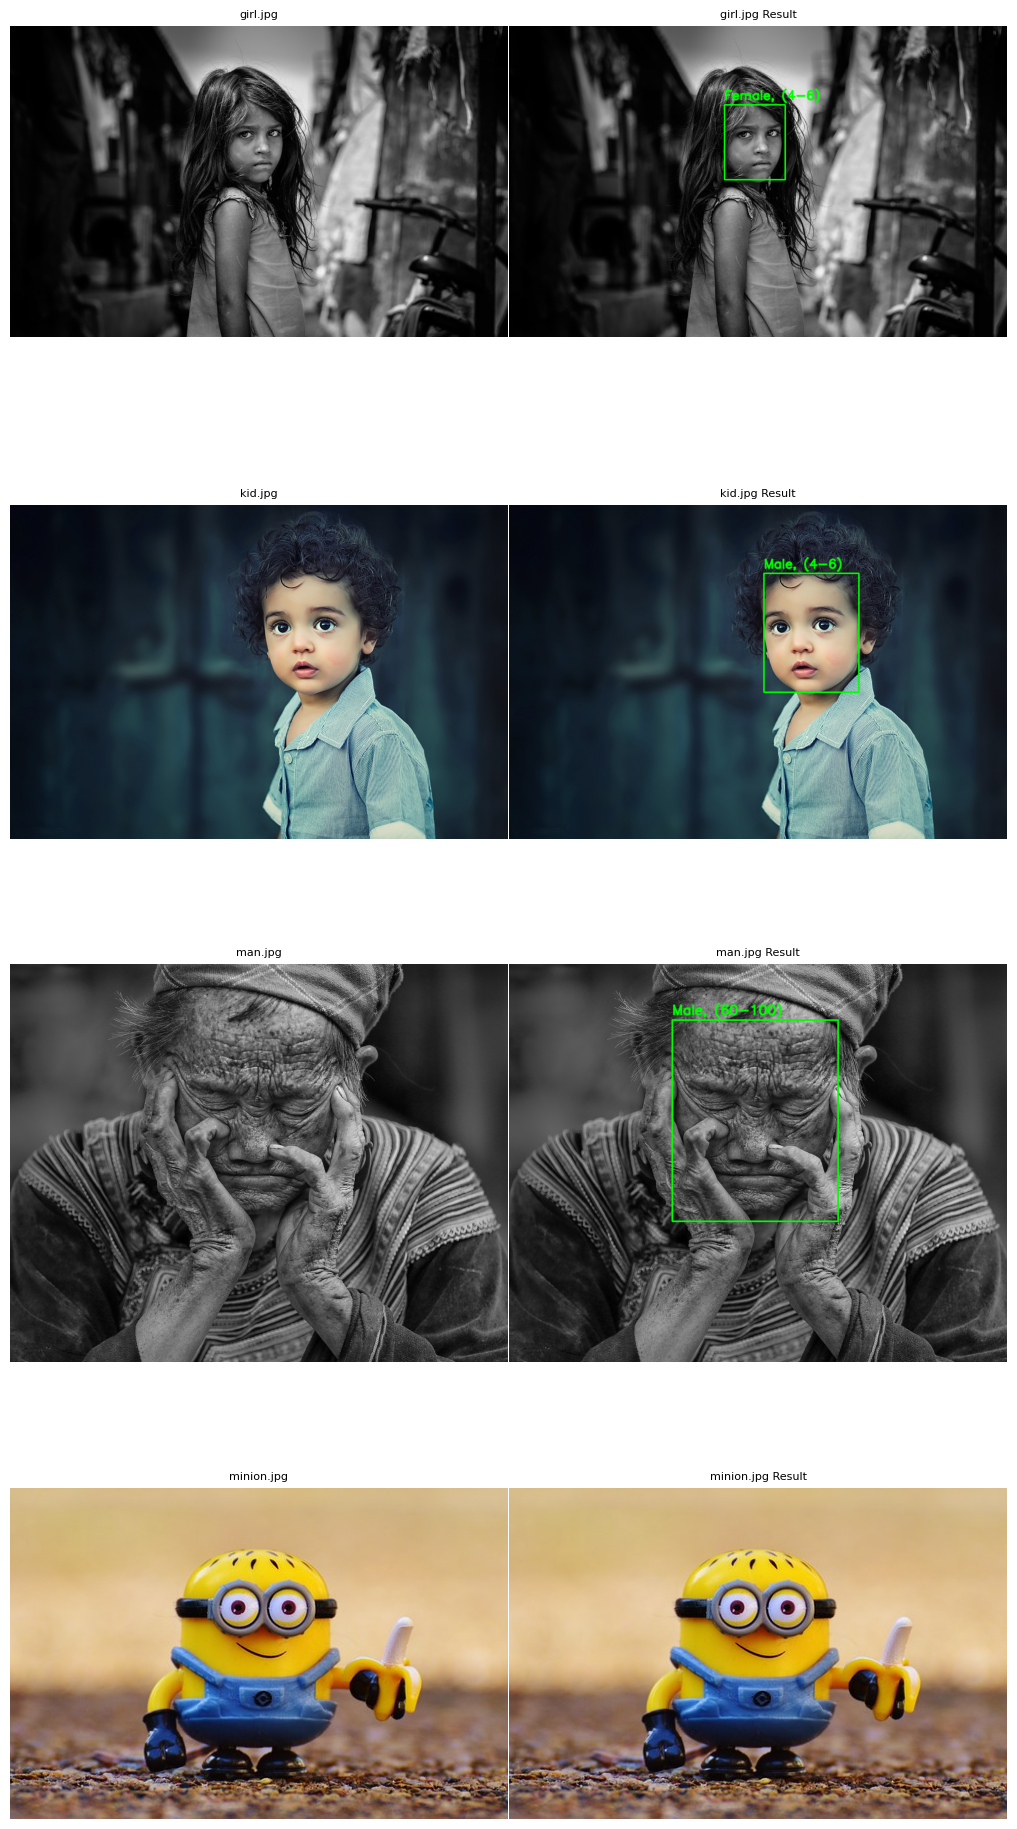

In [33]:
images_dict = {}
def detect_face_age_gender_in_image(image_path, images_dict):
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    result = detect_face_age_gender(image_rgb)
    filename = os.path.basename(image_path)
    output_path = os.path.join(OUTPUT_FOLDER, filename)
    result_bgr = cv2.cvtColor(result, cv2.COLOR_RGB2BGR)
    images_dict[filename] = image_rgb
    images_dict[filename + " Result"] = result
    cv2.imwrite(output_path, result_bgr)

OUTPUT_FOLDER = "outputImages"
if not os.path.exists(OUTPUT_FOLDER):
    os.makedirs(OUTPUT_FOLDER)
image_files = glob.glob(os.path.join("images", "*.[jp][pn]g")) + glob.glob(os.path.join("images", "*.jpeg"))

for image_path in image_files:
    detect_face_age_gender_in_image(image_path, images_dict)

display_images_from_dict(images_dict,2)

## Age Detection Using Webcam

In [34]:
# Constants for camera settings
CAMERA_DEVICE_ID = 0  # ID for the camera device
IMAGE_WIDTH = 800  # Width of the captured image
IMAGE_HEIGHT = 600  # Height of the captured image
fps = 0  # Initial Frames Per Second (FPS) value
padding = 20  # Padding around the detected face for cropping

if __name__ == "__main__":  # Ensures that the code only runs when executed directly
    try:
        cap = cv2.VideoCapture(CAMERA_DEVICE_ID)  # Initialize video capture with the specified camera device ID

        while True:  # Infinite loop to continuously capture frames

            start_time = time.time() # Record the start time to calculate FPS

            hasFrame, frame = cap.read()  # Capture a single frame from the camera
            if not hasFrame:  # Check if the frame was captured successfully
                cv2.waitKey()  # Wait indefinitely for a key event
                break  # Exit the loop if no frame is captured

            frame = cv2.resize(frame, (IMAGE_WIDTH, IMAGE_HEIGHT))  # Resize the frame to the specified dimensions
            
            # Detect age and gender using detect_face_age_gender
            resultImg = detect_face_age_gender(frame)

            # Display the frame with FPS overlay
            cv2.imshow("Detecting age and gender", visualize_fps(resultImg, fps))

            end_time = time.time()  # Record the end time to calculate FPS

            # Calculate the time taken to process the frame
            seconds = end_time
            # Calculate FPS based on the time taken to process the frame
            fps = 1.0 / seconds

            # Break the loop if the 'Esc' key (ASCII 27) is pressed
            if cv2.waitKey(33) == 27:
                break
    except Exception as e:  # Handle exceptions that may occur
        print(e)  # Print the exception message
    finally:
        cv2.destroyAllWindows()  # Close all OpenCV windows
        cap.release()  # Release the camera resource


## Age and Gender Detection Using Video

In [35]:
# Constants for video settings
# Define the path to the video file using os.path.join
CAMERA_DEVICE_ID = os.path.join("videos", "Jobs_2.mp4")  # Path to the video file
IMAGE_WIDTH = 1000  # Width of the displayed image
IMAGE_HEIGHT = 600  # Height of the displayed image
fps = 0  # Initial Frames Per Second (FPS) value
FRAME_RATE = 30  # Desired frame rate
DURATION = 1 / FRAME_RATE  # Duration of each frame

if __name__ == "__main__":  # Ensures that the code only runs when executed directly
    try:
        cap = cv2.VideoCapture(CAMERA_DEVICE_ID)  # Initialize video capture with the specified video file path

        while True:  # Infinite loop to continuously capture frames
            start_time = time.time()  # Record the start time to calculate FPS

            hasFrame, frame = cap.read()  # Capture a single frame from the video

            if not hasFrame:  # Check if the frame was captured successfully
                cv2.waitKey()  # Wait indefinitely for a key event
                break  # Exit the loop if no frame is captured

            frame = cv2.resize(frame, (IMAGE_WIDTH, IMAGE_HEIGHT))  # Resize the frame to the specified dimensions
            
            # Detect age and gender using detect_face_age_gender
            resultImg = detect_face_age_gender(frame)

            # Display the frame with FPS overlay
            cv2.imshow("Detecting age and gender", visualize_fps(resultImg, fps))

            end_time = time.time() # Record the end time to calculate FPS

            # Calculate the time taken to process the frame
            seconds = end_time - start_time

            # If the processing time is less than the desired frame duration, wait for the remaining time
            if seconds < DURATION:
                time.sleep(DURATION - seconds)

            # Recalculate the time taken to process the frame including sleep time
            seconds = time.time() - start_time
            # Calculate FPS based on the time taken to process the frame
            fps = 1.0 / seconds

            # Break the loop if the 'Esc' key (ASCII 27) is pressed
            if cv2.waitKey(33) == 27:
                break
    except Exception as e:  # Handle exceptions that may occur
        print(e)  # Print the exception message
    finally:
        cv2.destroyAllWindows()  # Close all OpenCV windows
        cap.release()  # Release the video capture resource


In [36]:
INPUT_VIDEO_FOLDER = "videos"
OUTPUT_VIDEO_FOLDER = "outputVideos"


if not os.path.exists(OUTPUT_VIDEO_FOLDER):
    os.makedirs(OUTPUT_VIDEO_FOLDER)

video_files = glob.glob(os.path.join(INPUT_VIDEO_FOLDER, "*.mp4"))

for video_path in video_files:
    output_video_path = os.path.join(OUTPUT_VIDEO_FOLDER, os.path.basename(video_path))

    try:
        cap = cv2.VideoCapture(video_path)

        frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
        frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
        fps = cap.get(cv2.CAP_PROP_FPS)

        fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for MP4 format
        out = cv2.VideoWriter(output_video_path, fourcc, fps, (IMAGE_WIDTH, IMAGE_HEIGHT))

        while True:
            ret, frame = cap.read()
            if not ret:
                break

            frame_resized = cv2.resize(frame, (IMAGE_WIDTH, IMAGE_HEIGHT))
            cartoon_frame = detect_face_age_gender(frame_resized)
            out.write(cartoon_frame)
            time.sleep(DURATION)

    except Exception as e:
        print(f"Error processing video {video_path}: {e}")
    finally:
        cap.release()
        out.release()

    print(f"Age & Face detected video saved as {output_video_path}")


No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detect